## It is required to implement your own Deutsch Jozsa algorithm.
# 1. Objective
*   Review quantum Deutsch Jozsa implementation
*   Learn how to implement a quantum circuit that implements quantum Deutsch Jozsa algorithm.

# 2. Qiskit
First you need to install Qiskit using the following command.



# 3. Import the following libraries
To work with Qiskit, you need to import the important libraries e.g.

QuantumRegister to define the quantum registers that holds the qubits, ClassicalRegister that holds the classical bits, and QuantumCircuit to define your own circuit.

Also, you need to import the visualization and the excusion libraries.

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit import transpile

# 4. Design and Implement:

   Resource on Deutsch Jozsa: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_parallelism_Deutsch_Jozsa.ipynb




In [8]:
import random

def constant_function(input, output):
    constant_qc = QuantumCircuit(input, output)
    choice = random.randint(1, 2)
    print("choice chosen is : ", choice)
    if choice == 1:
        constant_qc.x(output)
    ## else no change
    return constant_qc

## Up to all the possible balanced functions, for n = 2
def balanced_function(n, input, output):
    balanced_qc = QuantumCircuit(input, output)
    choice = random.randint(1, 6)
    print("choice chosen is : ", choice)
    if choice == 1:
        balanced_qc.x(input)
        balanced_qc.cx(input, output)
        balanced_qc.x(input)  #to go back to its initial state
    elif choice == 2:
        balanced_qc.cx(input, output)
    elif choice == 3:
        balanced_qc.cx(input[0], output)
    elif choice == 4:
        balanced_qc.cx(input[1 % n], output)
    elif choice == 5:
        balanced_qc.x(input[0])
        balanced_qc.cx(input[0], output)
        balanced_qc.x(input[0])
    elif choice == 6:
        balanced_qc.x(input[1 % n])
        balanced_qc.cx(input[1 % n], output)
        balanced_qc.x(input[1])
    return balanced_qc


In [9]:
def DJ(n, is_constant):
    input = QuantumRegister(n, 'x')
    output = QuantumRegister(1, 'y')
    c = ClassicalRegister(n, 'c')
    Deutsch_Jozsa = QuantumCircuit(input, output, c)

    ## Initializing the circuit
    Deutsch_Jozsa.h(input)
    Deutsch_Jozsa.initialize([0, 1], output)
    Deutsch_Jozsa.h(output)

    Deutsch_Jozsa.barrier()

    ## Applying Query Function(Balanced or Constant)
    if is_constant is True:
        # Deutsch_Jozsa.x(output)
        Deutsch_Jozsa = Deutsch_Jozsa.compose(constant_function(input, output))
    else:
        # Deutsch_Jozsa.cx(input[0], output)
        Deutsch_Jozsa = Deutsch_Jozsa.compose(balanced_function(n, input, output))

    Deutsch_Jozsa.barrier()

    ## Final part for measurement
    Deutsch_Jozsa.h(input)

    Deutsch_Jozsa.measure(input, c)
    # print(Deutsch_Jozsa.draw('text'))
    display(Deutsch_Jozsa.draw('mpl'))
    backend = Aer.get_backend(name='qasm_simulator')
    circ_backend = transpile(Deutsch_Jozsa, backend)
    job = backend.run(circ_backend, shots=1)
    result = job.result()
    print(result.get_counts())
    display(plot_histogram(result.get_counts()))
    return result.get_counts()

In [10]:
def is_constant_or_balanced(counts):
    keys = list(counts.keys())
    print(keys)
    if any('1' in key for key in keys):
        print("This function is Balanced")
    else:
        print("This function is Constant")

## Example of a random Constant Function

choice chosen is :  1


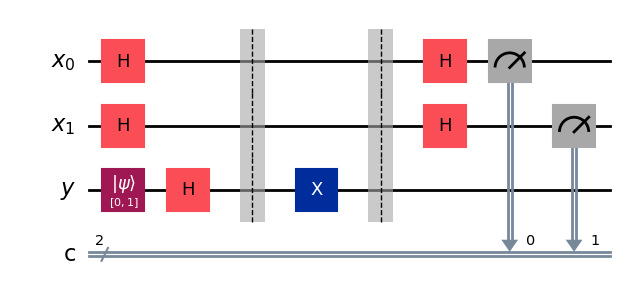

{'00': 1}


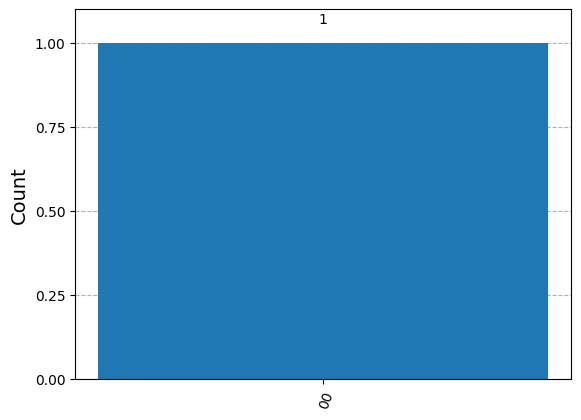

In [11]:
counts = DJ(n = 2, is_constant = True)

In [12]:
is_constant_or_balanced(counts)

['00']
This function is Constant


## Example of a random Balanced Function

choice chosen is :  2


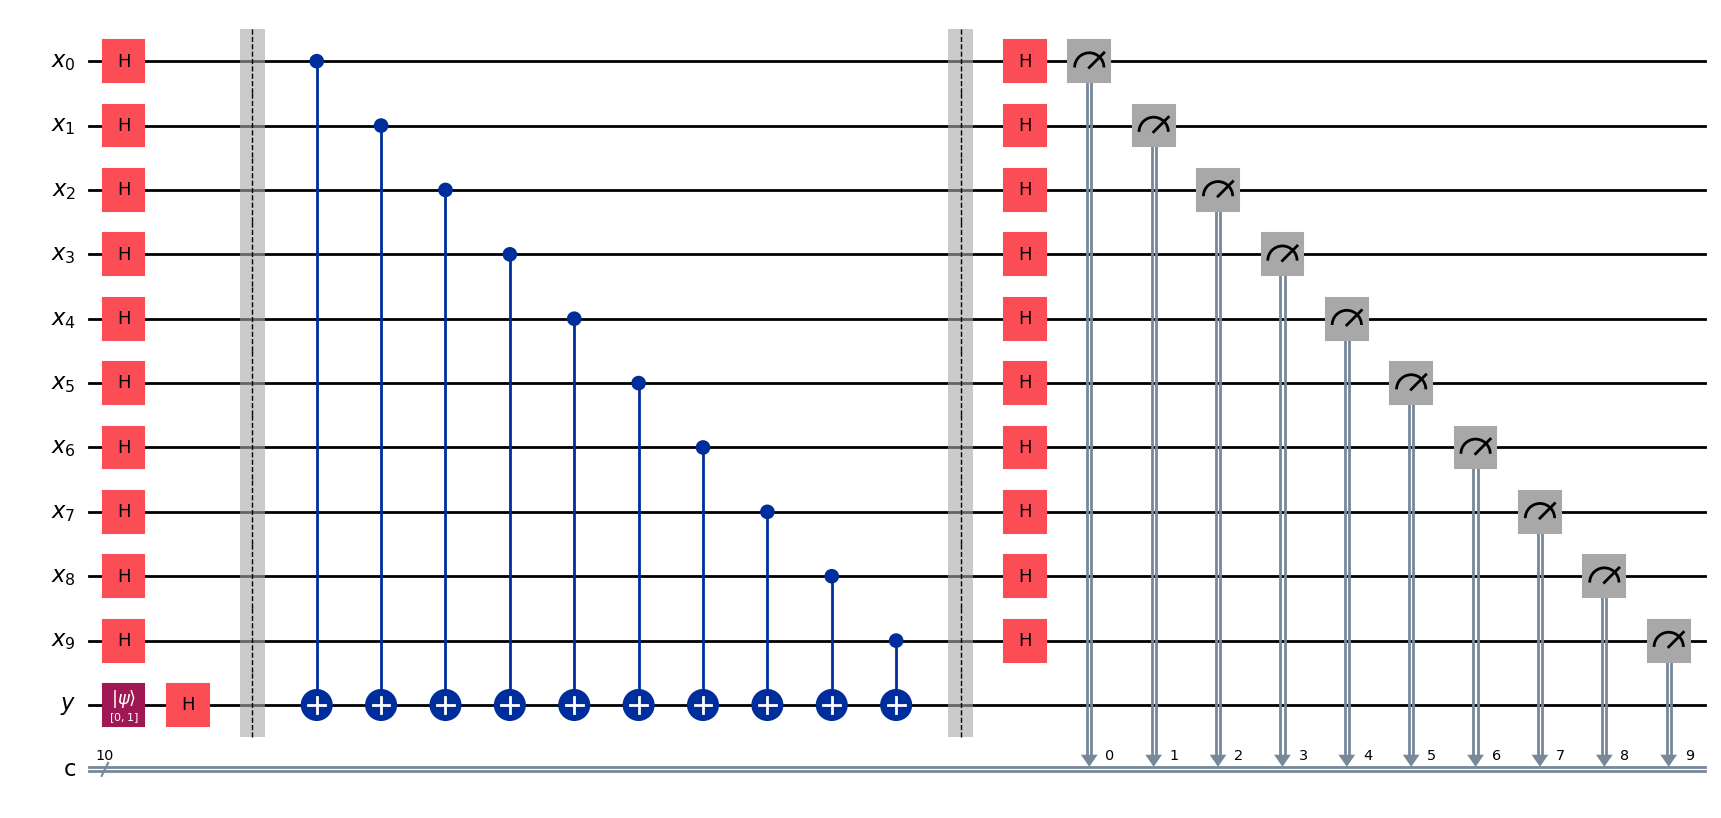

{'1111111111': 1}


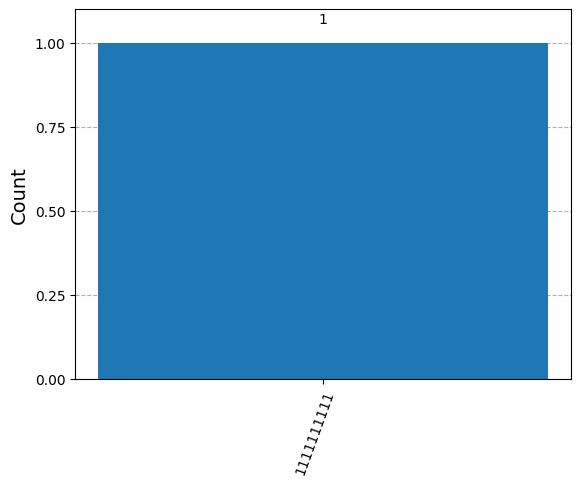

In [17]:
counts2 = DJ(n = 10, is_constant = False)

In [18]:
is_constant_or_balanced(counts2)

['1111111111']
This function is Balanced


## Another Example of Balanced Function with different #bits

choice chosen is :  6


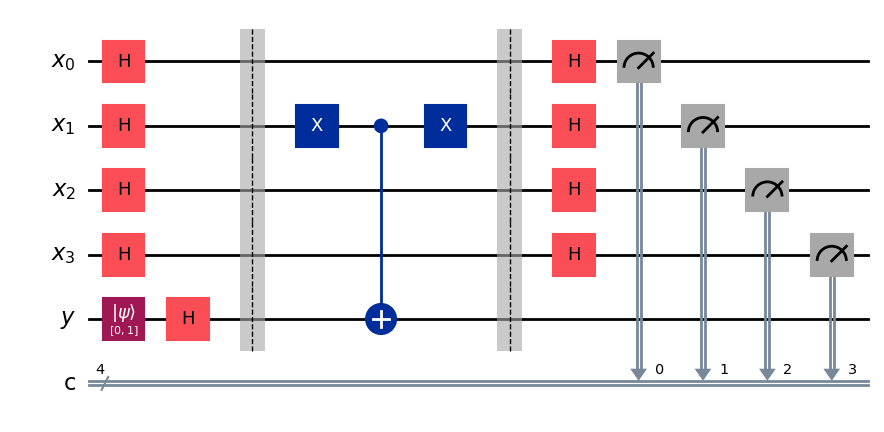

{'0010': 1}


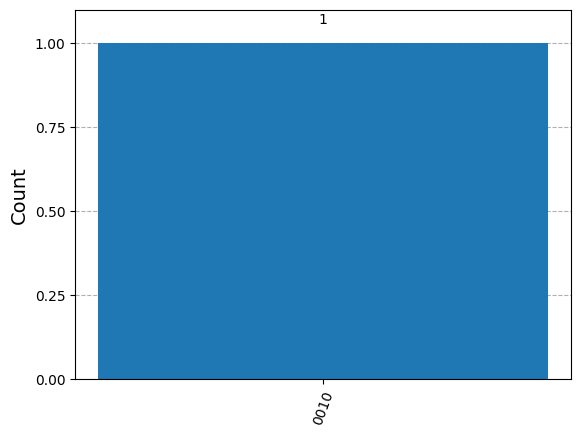

In [19]:
counts3 = DJ(n = 4, is_constant = False)

In [20]:
is_constant_or_balanced(counts3)

['0010']
This function is Balanced
